#  Install and import nedded libraries:

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm 
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix , confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from  nltk.stem import PorterStemmer
#import scikitplot.estimators as esti
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

import time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# Read Data set 

In [2]:
#Read Data set
Data = pd.read_csv("news.csv",encoding='latin-1')
Data = Data[['title' , 'text' , 'label']]
Data

,title,text,label
0,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


# preprocessing for data and applying nlp techniques

,text,label
0,daniel greenfield shillman journalism fellow f...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u secretary state john f kerry said monday sto...,1
3,â kaydee king november lesson tonight dem lo...,0
4,primary day new york front runner hillary clin...,1
5,iâm immigrant grandparent year ago arrived n...,0
6,share baylee luciani left screenshot baylee ca...,0
7,czech stockbroker saved jewish child nazi germ...,1
8,hillary clinton donald trump made inaccurate c...,1
9,iranian negotiator reportedly made last ditch ...,1


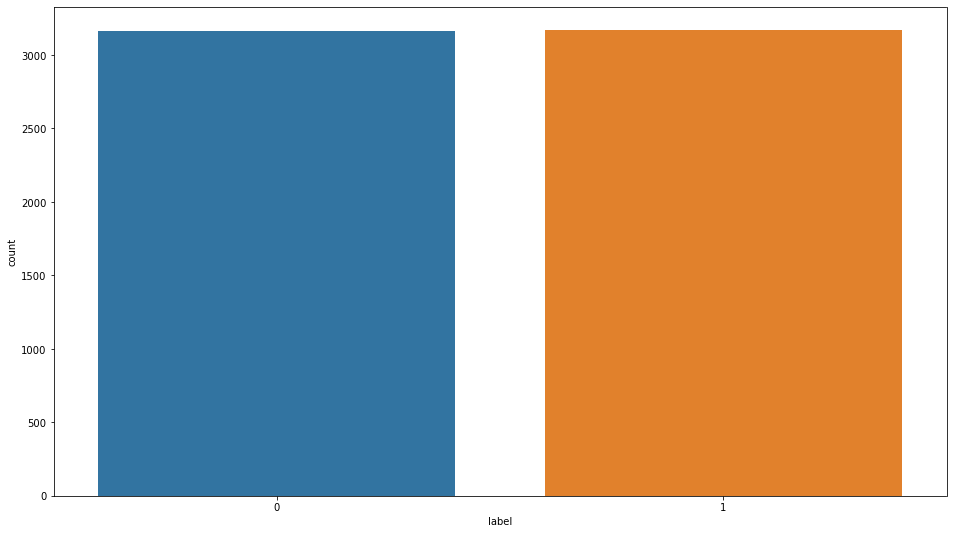

In [3]:
##change fake and real to 0 and 1 
Data['label']=np.where(Data['label']=='FAKE',0,1)

##plotting real and fake news numbers "to make sure they are almost equal"
plt.figure(figsize=(16,9))
sns.countplot(Data.label)

##checking that there is no null values 
Data.isna().sum()
#Data['text'] = Data['title'] + ' ' + Data['text']
#del Data['text']
del Data['title']

  
###############################################################################

stemmer = PorterStemmer()
stemmer2 = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
def Clean(text):

  # Frist converting all letters to lower case
  text= text.lower()
  
  # removing unwanted digits ,special chracters from the text
  text= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", text).split()) #tags
  text= ' '.join(re.sub("^@?(\w){1,15}$", " ", text).split())
   
  #text= ' '.join(re.sub("â", " ", text).split())
  #text= ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split())   #Links
  #text= ' '.join(re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"," ", text).split()) 
  #text= ' '.join(re.sub(r'http\S+', '',text).split())
  
  
  #text= ' '.join(re.sub(r'www\S+', '',text).split())
  #text= ' '.join(re.sub("\s+", " ",text).split()) #Extrem white Space
  #text= ' '.join(re.sub("[^-9A-Za-z ]", "" ,text).split()) #digits 
  text= ' '.join(re.sub('-', ' ', text).split()) 
  text= ' '.join(re.sub('_', ' ', text).split()) #underscore 
  
  #Display available PUNCTUATION for examples for c in string.punctuation:
  #print(f"[{c}]")
  
  # removing stopwards and numbers from STRING library
  table= str.maketrans('', '', string.punctuation+string.digits)
  text = text.translate(table)
  
  # Split Sentence as tokens words 
  tokens = word_tokenize(text)
  
  # converting words to their root forms by STEMMING THE WORDS 
  stemmed2 = [lemmatizer.lemmatize(word) for word in tokens] #Covert words to their actual root
  #stemmed2 = [stemmer2.stem(word) for word in tokens] # Covert words to their rootbut not actual
  
  # Delete each stop words from English stop words
  #words = [w for w in stemmed1 if not w in n_words] #n_words contains English stop words
  words = [w for w in stemmed2 if not w in stop_words] #n_words contains English stop words

  text  = ' '.join(words)
    
  return text
#########################################################

Data.text=[Clean(x) for x in Data.text]
Data.head(10)

# visualization for data 

visualization of FAKE news


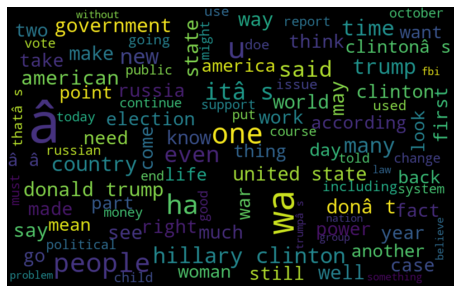

visualization of REAL news


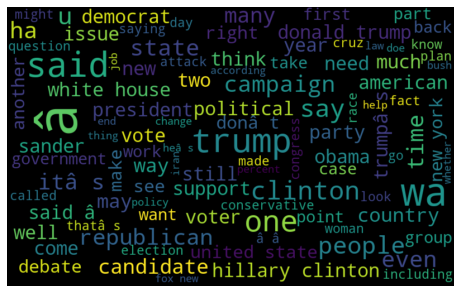

In [4]:
#Visualization of fake news
print("visualization of FAKE news")
fake_data = Data[Data['label'] == 0]
fake_data = ''.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=100).generate(fake_data)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


print("visualization of REAL news")
#Visualization of real news
real_data = Data[Data['label'] == 1]
real_data = ''.join([text for text in real_data.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=100).generate(real_data)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# feature extracion

In [5]:

#Splitting data into train and validation
train_x, test_x, train_y, test_y = train_test_split(Data['text'], Data['label'] , shuffle = False)

#feature extraction
vect  = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
train_vect= vect.fit_transform(train_x)
test_vect = vect.transform(test_x)


# classification function 

In [6]:
def TFIDFModels(Model,txt):
    model     = Model
    t0        = time.time()
    model.fit(train_vect, train_y)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1
    
    accuracy  = model.score(train_vect, train_y)
    predicted = model.predict(test_vect)
    
    report = classification_report(test_y, predicted, output_dict=True)
    
    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(test_y, predicted),'\n')
    
    print("confusion matrix for train data")
    plot_confusion_matrix(model , train_vect,train_y)
    plt.show()
    print("confusion matrix for test data")
    plot_confusion_matrix(model , test_vect,test_y)
    plt.show()
    print('\n -------------------------------------------------------------------------------------- \n')
    return_value = [accuracy_score(test_y, predicted) , time_train ]
    return return_value

# classification models 

Models with Tfidf Feature extraction Techniques : 

************************************************ 

Naive Bays Model : 
 
Training time: 0.000000s; Prediction time: 0.008315s 

Accuracy score train set : 0.9446432330035782
Accuracy score test set  : 0.8952020202020202 

confusion matrix for train data


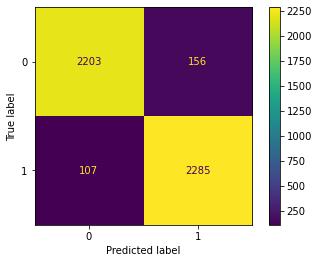

confusion matrix for test data


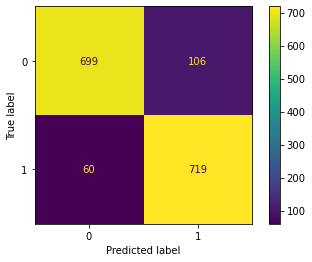


 -------------------------------------------------------------------------------------- 

Logistic Regression Model : 
 
Training time: 0.246657s; Prediction time: 0.000000s 

Accuracy score train set : 0.9675857714165439
Accuracy score test set  : 0.922979797979798 

confusion matrix for train data


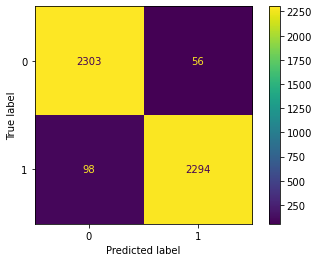

confusion matrix for test data


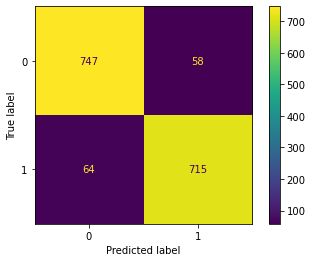


 -------------------------------------------------------------------------------------- 

Support Vector Classifier Model : 
 
Training time: 17.931853s; Prediction time: 5.574586s 

Accuracy score train set : 0.9960008419280152
Accuracy score test set  : 0.9501262626262627 

confusion matrix for train data


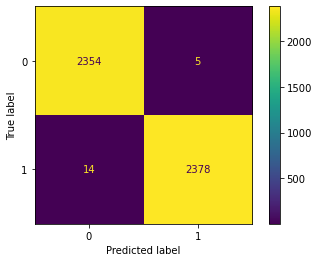

confusion matrix for test data


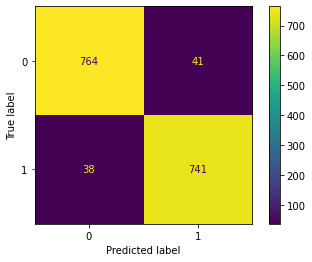


 -------------------------------------------------------------------------------------- 

Decision Tree Classifier Model : 
 
Training time: 4.125268s; Prediction time: 0.000000s 

Accuracy score train set : 1.0
Accuracy score test set  : 0.8175505050505051 

confusion matrix for train data


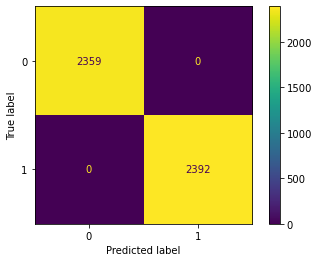

confusion matrix for test data


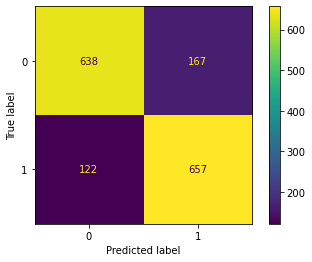


 -------------------------------------------------------------------------------------- 



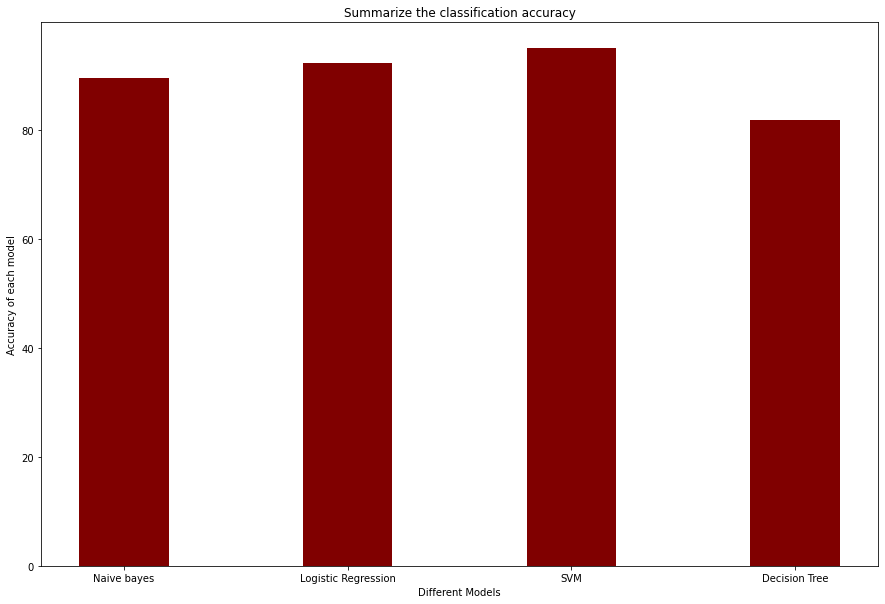

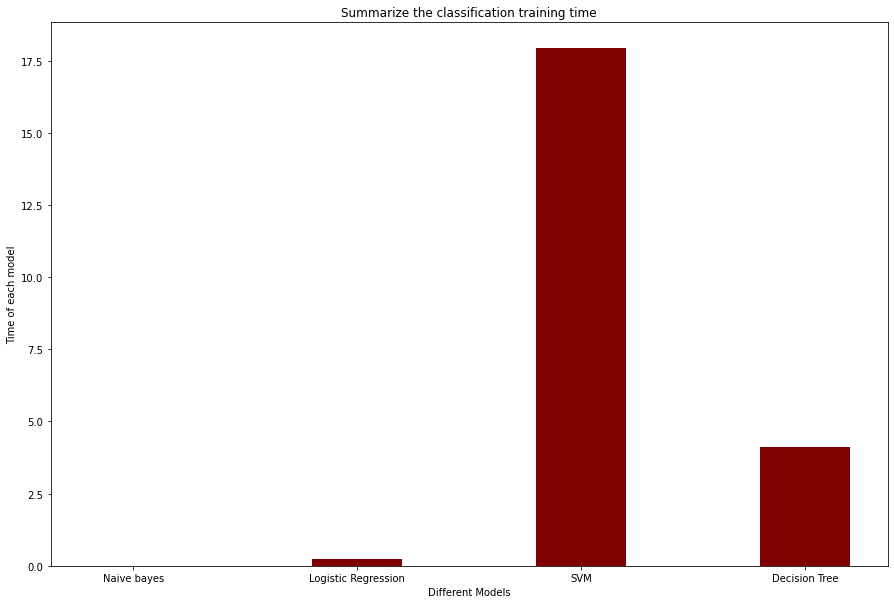

In [7]:
print('Models with Tfidf Feature extraction Techniques : \n')
print('************************************************ \n')

SupportVectorClassifier=svm.SVC(kernel='linear')
naive_bayes_values = NaiveBayes = TFIDFModels(Model=naive_bayes.MultinomialNB(alpha=0.2),txt='Naive Bays Model : \n ')
log_reg_values=LogReg=TFIDFModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ')
svm_reg_values=svm=TFIDFModels(Model=SupportVectorClassifier,txt='Support Vector Classifier Model : \n ')
dec_tree_values=DecTree=TFIDFModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ')


thisdict = {
  "Naive bayes": (naive_bayes_values[0] * 100),
  "Logistic Regression":(log_reg_values[0]* 100) ,
  "SVM": (svm_reg_values[0]*100),
  "Decision Tree": (dec_tree_values[0]*100)
}

thisdict2 = {
  "Naive bayes": (naive_bayes_values[1] ),
  "Logistic Regression":(log_reg_values[1]) ,
  "SVM": (svm_reg_values[1]),
  "Decision Tree": (dec_tree_values[1])
}

Models = list(thisdict.keys())
Accuracy = list(thisdict.values())
Time = list(thisdict2.values())
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(Models, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Different Models")
plt.ylabel("Accuracy of each model")
plt.title("Summarize the classification accuracy")
plt.show()

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(Models, Time, color ='maroon',
        width = 0.4)
 
plt.xlabel("Different Models")
plt.ylabel("Time of each model")
plt.title("Summarize the classification training time")
plt.show()
